# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 569


--------------

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={'metric'}&q= {city}"
    city_url = f"{url}appid={weather_api_key}&units={'metric'}&q= {city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds =  city_weather['clouds']['all']
        city_wind =  city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | falmouth
Processing Record 2 of Set 1 | badger
Processing Record 3 of Set 1 | atlantis
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | barcelos
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | papatowai
City not found. Skipping...
Processing Record 10 of Set 1 | griffith
Processing Record 11 of Set 1 | claveria
Processing Record 12 of Set 1 | constantia
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | wailua homesteads
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | fale old settlement
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | saint-pierre
Processing Record 20 of Set 1 | kievskiy
City not found. Skipping...
Proce

Processing Record 29 of Set 4 | whyalla stuart
City not found. Skipping...
Processing Record 30 of Set 4 | novovarshavka
Processing Record 31 of Set 4 | la passe
City not found. Skipping...
Processing Record 32 of Set 4 | tsarevo
Processing Record 33 of Set 4 | acarau
Processing Record 34 of Set 4 | epe
Processing Record 35 of Set 4 | niafunke
City not found. Skipping...
Processing Record 36 of Set 4 | fayroz koh
City not found. Skipping...
Processing Record 37 of Set 4 | tura
Processing Record 38 of Set 4 | martapura
Processing Record 39 of Set 4 | alnashi
Processing Record 40 of Set 4 | ulsteinvik
Processing Record 41 of Set 4 | agat village
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | aspen
Processing Record 44 of Set 4 | grande prairie
Processing Record 45 of Set 4 | punta arenas
Processing Record 46 of Set 4 | amuntai
Processing Record 47 of Set 4 | bouar
Processing Record 48 of Set 4 | suntar
Processing Record 49 of Set 4 | sechura
Processing Record 0 of 

City not found. Skipping...
Processing Record 11 of Set 8 | plastun
Processing Record 12 of Set 8 | tobi village
City not found. Skipping...
Processing Record 13 of Set 8 | anibare
City not found. Skipping...
Processing Record 14 of Set 8 | saint-philippe
Processing Record 15 of Set 8 | prince rupert
Processing Record 16 of Set 8 | kharp
Processing Record 17 of Set 8 | keetmanshoop
Processing Record 18 of Set 8 | ceerigaabo
Processing Record 19 of Set 8 | maxixe
Processing Record 20 of Set 8 | new norfolk
Processing Record 21 of Set 8 | la sarre
Processing Record 22 of Set 8 | al muwayh
Processing Record 23 of Set 8 | howard springs
City not found. Skipping...
Processing Record 24 of Set 8 | praya
Processing Record 25 of Set 8 | cabedelo
Processing Record 26 of Set 8 | polyarnyy
Processing Record 27 of Set 8 | petawawa
Processing Record 28 of Set 8 | sarankhola
Processing Record 29 of Set 8 | margate
Processing Record 30 of Set 8 | al artawiyah
Processing Record 31 of Set 8 | labytnang

Processing Record 40 of Set 11 | riversdale
Processing Record 41 of Set 11 | turpan
Processing Record 42 of Set 11 | viedma
Processing Record 43 of Set 11 | san antonio de pale
City not found. Skipping...
Processing Record 44 of Set 11 | talcahuano
Processing Record 45 of Set 11 | minot air force base
Processing Record 46 of Set 11 | caleta olivia
Processing Record 47 of Set 11 | dauphin
Processing Record 48 of Set 11 | saint-leu
Processing Record 49 of Set 11 | tocopilla
Processing Record 0 of Set 12 | karis
Processing Record 1 of Set 12 | praia
Processing Record 2 of Set 12 | lagoa
Processing Record 3 of Set 12 | birao
Processing Record 4 of Set 12 | lys'va
City not found. Skipping...
Processing Record 5 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 6 of Set 12 | tianpeng
Processing Record 7 of Set 12 | quang ngai
Processing Record 8 of Set 12 | port glaud
City not found. Skipping...
Processing Record 9 of Set 12 | villa del prado
Processing Record 10 of Set 12

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          493
Lat           493
Lng           493
Max Temp      493
Humidity      493
Cloudiness    493
Wind Speed    493
Country       493
Date          493
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,falmouth,50.1544,-5.0711,13.50,100,53,1.03,GB,1691380545
1,badger,64.8000,-147.5333,25.95,50,100,0.00,US,1691380545
2,atlantis,-33.5667,18.4834,9.53,85,0,1.54,ZA,1691380546
3,adamstown,-25.0660,-130.1015,20.70,67,40,7.11,PN,1691380546
4,edinburgh of the seven seas,-37.0676,-12.3116,11.49,56,35,13.57,SH,1691380547


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,falmouth,50.1544,-5.0711,13.50,100,53,1.03,GB,1691380545
1,badger,64.8000,-147.5333,25.95,50,100,0.00,US,1691380545
2,atlantis,-33.5667,18.4834,9.53,85,0,1.54,ZA,1691380546
3,adamstown,-25.0660,-130.1015,20.70,67,40,7.11,PN,1691380546
4,edinburgh of the seven seas,-37.0676,-12.3116,11.49,56,35,13.57,SH,1691380547


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

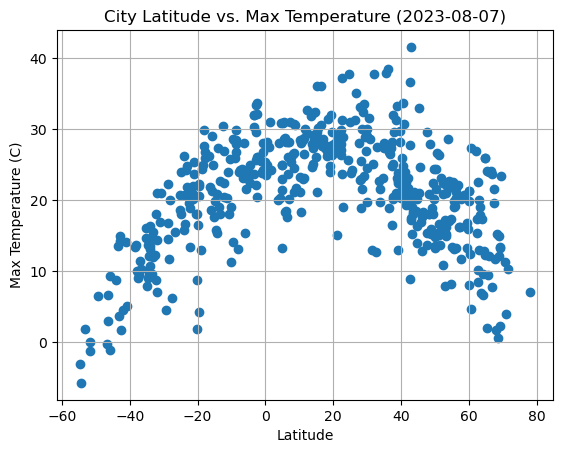

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Unix timestamp
timestamp =city_data_df["Date"][0]
# Convert the Unix timestamp to a time tuple
time_tuple = time.gmtime(timestamp)
# Format the time tuple to a string of your choice
formatted_date = time.strftime('%Y-%m-%d', time_tuple)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({formatted_date})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

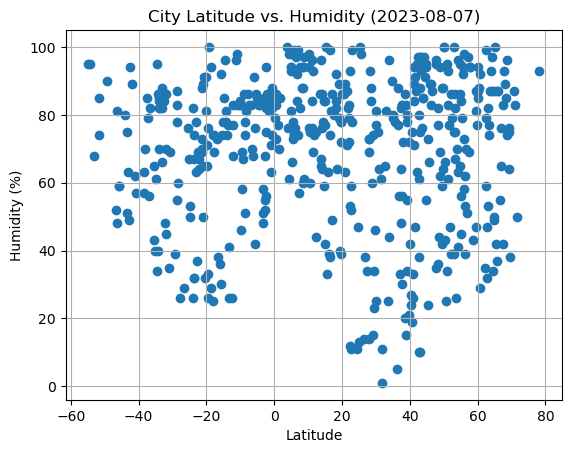

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({formatted_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

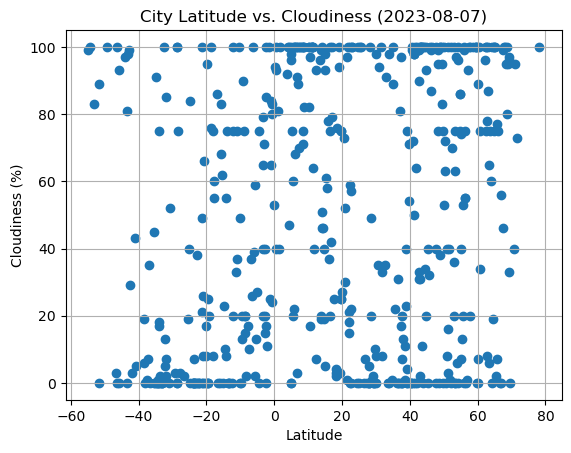

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({formatted_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

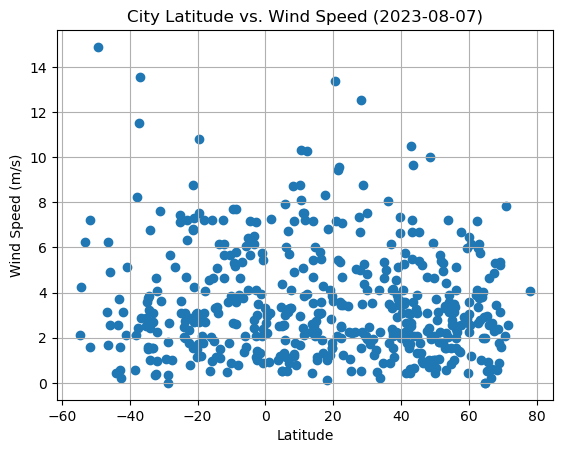

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({formatted_date})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_reg_plt(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-",label="_nolegend_")
    return rvalue, line_eq

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,falmouth,50.1544,-5.0711,13.50,100,53,1.03,GB,1691380545
1,badger,64.8000,-147.5333,25.95,50,100,0.00,US,1691380545
5,barcelos,41.5388,-8.6151,19.36,47,0,2.66,PT,1691380547
8,griffith,41.5284,-87.4237,20.03,91,100,2.06,US,1691380549
9,claveria,18.6074,121.0832,31.44,64,76,6.80,PH,1691380550


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,atlantis,-33.5667,18.4834,9.53,85,0,1.54,ZA,1691380546
3,adamstown,-25.0660,-130.1015,20.70,67,40,7.11,PN,1691380546
4,edinburgh of the seven seas,-37.0676,-12.3116,11.49,56,35,13.57,SH,1691380547
6,port-aux-francais,-49.3500,70.2167,6.47,90,100,14.88,TF,1691380547
7,puerto ayora,-0.7393,-90.3518,24.19,88,83,0.89,EC,1691380548


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6


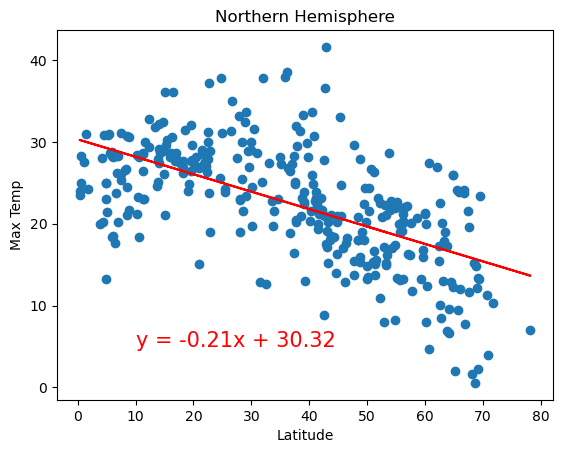

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
rvalue, line_eq = linear_reg_plt(x_values,y_values)

plt.title('Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-value is: {round(rvalue,2)}")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.show()

The r-value is: 0.81


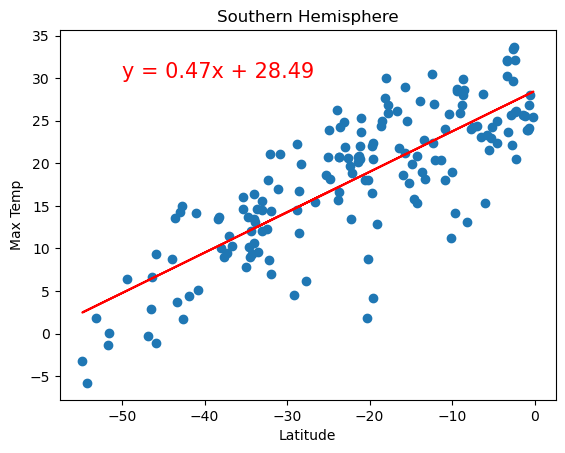

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
rvalue, line_eq = linear_reg_plt(x_values,y_values)

plt.title('Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-value is: {round(rvalue,2)}")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** Since r value is about -0.6 in the northern hemisphere, latitude and maximum temperature have moderate negative correlation. In the southern hemispheres, r value is about 0.81, so latitude and maximum temperature have relatively strong positive correlation. That is, the maximum temperature tends to decrease from the equator to the poles. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.08


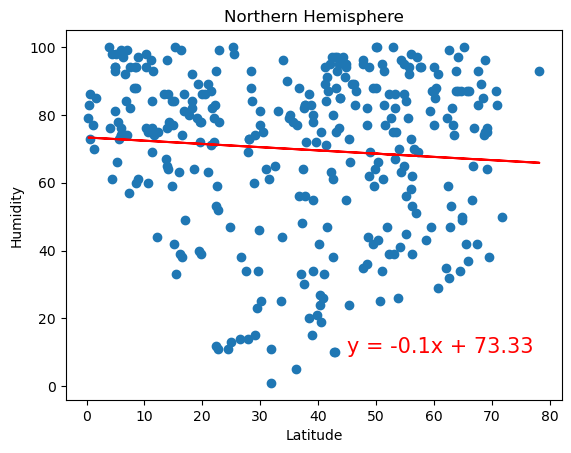

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
rvalue, line_eq = linear_reg_plt(x_values,y_values)

plt.title('Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is: {round(rvalue,2)}")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.show()

The r-value is: 0.06


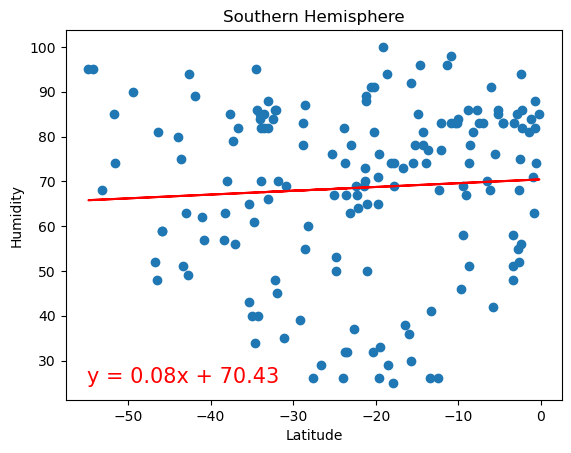

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
rvalue, line_eq = linear_reg_plt(x_values,y_values)

plt.title('Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is: {round(rvalue,2)}")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** Since the value of r is close to zero in both the northern and southern hemispheres, it is reasonable to assume that there is no correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.04


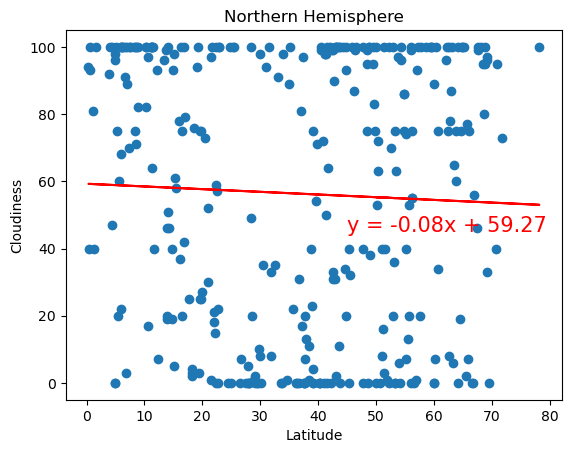

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
rvalue, line_eq = linear_reg_plt(x_values,y_values)

plt.title('Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {round(rvalue,2)}")
plt.annotate(line_eq,(45,45),fontsize=15,color="red")
plt.show()

The r-value is: 0.03


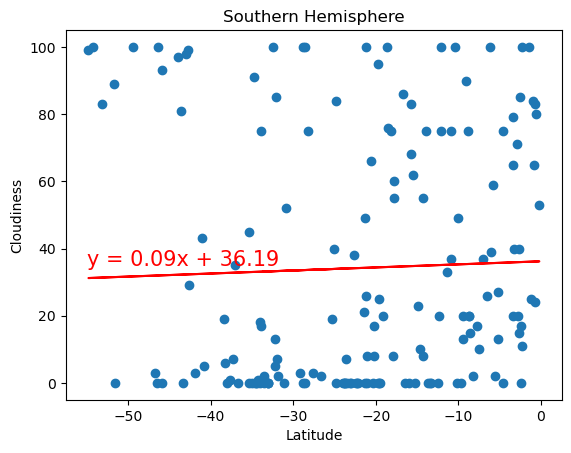

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
rvalue, line_eq = linear_reg_plt(x_values,y_values)

plt.title('Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {round(rvalue,2)}")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** In both the northern and southern hemispheres it is reasonable to assume that there is no correlation between latitude and cloudiness because the value of r is close to zero, respectively. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.11


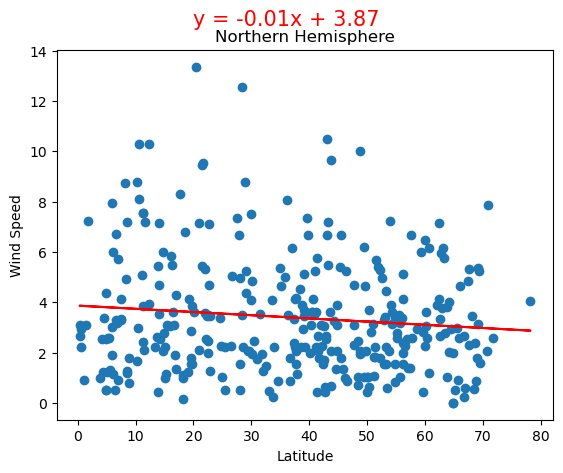

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
rvalue, line_eq = linear_reg_plt(x_values,y_values)

plt.title('Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-value is: {round(rvalue,2)}")

plt.text(20, 15, line_eq, fontsize=15, color="red")
plt.show()

The r-value is: -0.01


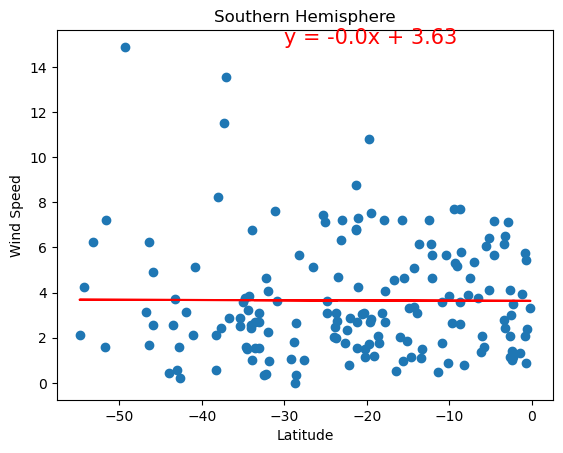

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
rvalue, line_eq = linear_reg_plt(x_values,y_values)

plt.title('Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-value is: {round(rvalue,2)}")
plt.text(-30, 15, line_eq, fontsize=15, color="red")
plt.show()

**Discussion about the linear relationship:**  In both the northern and southern hemispheres, latitude and wind speed are weakly correlated because the absolute value of r is less than 0.2.